In [23]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import torch
from torch import nn

from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score

In [24]:
df_train = pd.read_csv('monks-3.train', sep='\s+', skip_blank_lines=False, skipinitialspace=False, names=["class", 'a1', 'a2', 'a3', 'a4', 'a5', 'a6', 'ID'])
df_train

,class,a1,a2,a3,a4,a5,a6,ID
0,1,1,1,1,1,1,2,data_2
1,1,1,1,1,1,2,1,data_3
2,1,1,1,1,1,2,2,data_4
3,0,1,1,1,1,3,1,data_5
4,0,1,1,1,1,4,1,data_7
...,...,...,...,...,...,...,...,...
117,0,3,3,2,2,2,2,data_420
118,0,3,3,2,2,3,2,data_422
119,0,3,3,2,3,1,1,data_425
120,0,3,3,2,3,3,2,data_430


In [25]:
df_test = pd.read_csv('monks-3.test', sep='\s+', skip_blank_lines=False, skipinitialspace=False, names=["class", 'a1', 'a2', 'a3', 'a4', 'a5', 'a6', 'ID'])
df_test

,class,a1,a2,a3,a4,a5,a6,ID
0,1,1,1,1,1,1,1,data_1
1,1,1,1,1,1,1,2,data_2
2,1,1,1,1,1,2,1,data_3
3,1,1,1,1,1,2,2,data_4
4,1,1,1,1,1,3,1,data_5
...,...,...,...,...,...,...,...,...
427,0,3,3,2,3,2,2,data_428
428,0,3,3,2,3,3,1,data_429
429,0,3,3,2,3,3,2,data_430
430,0,3,3,2,3,4,1,data_431


In [26]:
X_df_train = df_train.drop(['class', 'ID'], axis=1)
X_df_train = pd.get_dummies(X_df_train, columns=X_df_train.columns)
y_df_train = df_train[['class']]

X_train = torch.from_numpy(X_df_train.to_numpy(dtype=np.float32))
y_train = torch.from_numpy(y_df_train.to_numpy(dtype=np.float32))

print(X_train.shape, y_train.shape)

torch.Size([122, 17]) torch.Size([122, 1])


In [27]:
X_df_test = df_test.drop(['class', 'ID'], axis=1)
X_df_test = pd.get_dummies(X_df_test, columns=X_df_test.columns)
y_df_test = df_test[['class']]

X_test = torch.from_numpy(X_df_test.to_numpy(dtype=np.float32))
y_test = torch.from_numpy(y_df_test.to_numpy(dtype=np.float32))

print(X_test.shape, y_test.shape)

torch.Size([432, 17]) torch.Size([432, 1])


In [28]:
def weights_init_uniform_rule(m):
    classname = m.__class__.__name__
    # for every Linear layer in a model..
    if classname.find('Linear') != -1:
        # get the number of the inputs
        n = m.in_features
        y = 1.0/np.sqrt(n)
        m.weight.data.uniform_(-y, y)
        m.bias.data.fill_(0)


Epoch is 0   | MSE Loss: 1.0609756708145142     | Test MSE loss: 1.1306761503219604    
Epoch is 10  | MSE Loss: 0.9123459458351135     | Test MSE loss: 0.9764952063560486    
Epoch is 20  | MSE Loss: 0.777259349822998      | Test MSE loss: 0.8358211517333984    
Epoch is 30  | MSE Loss: 0.660494863986969      | Test MSE loss: 0.7135512232780457    
Epoch is 40  | MSE Loss: 0.5639162659645081     | Test MSE loss: 0.6116088032722473    
Epoch is 50  | MSE Loss: 0.4864485263824463     | Test MSE loss: 0.5289638042449951    
Epoch is 60  | MSE Loss: 0.425250381231308      | Test MSE loss: 0.4628409743309021    
Epoch is 70  | MSE Loss: 0.3771115243434906     | Test MSE loss: 0.4101082980632782    
Epoch is 80  | MSE Loss: 0.33923161029815674    | Test MSE loss: 0.36802029609680176   
Epoch is 90  | MSE Loss: 0.309345543384552      | Test MSE loss: 0.33433231711387634   
Epoch is 100 | MSE Loss: 0.28562378883361816    | Test MSE loss: 0.30721166729927063   
Epoch is 110 | MSE Loss: 0.26658

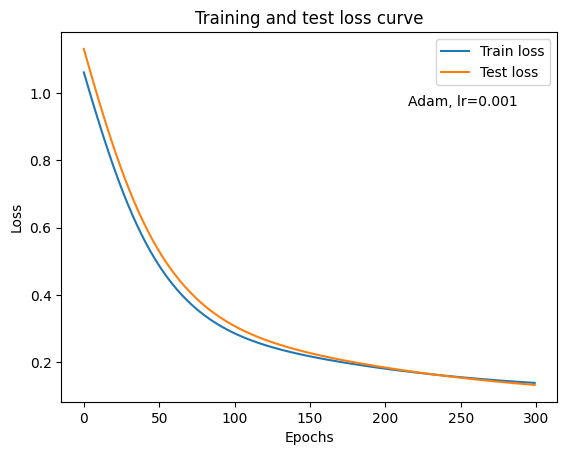

In [29]:
model_0 = nn.Sequential(
    nn.Linear(in_features=17, out_features=4),
    nn.Linear(in_features=4, out_features=1), 
    nn.Tanh()
)

model_0.apply(weights_init_uniform_rule)

loss_fn = nn.MSELoss()

lr = 0.001
optimizer = torch.optim.Adam(model_0.parameters(), lr=lr)

torch.manual_seed(42)

epochs = 300

epoch_count = []
loss_values = []
test_loss_values = []

for epoch in range(epochs):
    model_0.train()
     
    y_pred = model_0(X_train)
     
    loss = loss_fn(y_pred, y_train)
     
    optimizer.zero_grad()
     
    loss.backward()
     
    optimizer.step()
     
    model_0.eval()
     
    with torch.inference_mode():
        test_pred = model_0(X_test)
         
        test_loss = loss_fn(test_pred, y_test)
        #test_accuracy = accuracy_score(y_test, test_pred)
        
    
    epoch_count.append(epoch)
    loss_values.append(loss)
    test_loss_values.append(test_loss)
         
    if epoch % 10 == 0:
        print(f"Epoch is {epoch:<3} | MSE Loss: {loss:<22} | Test MSE loss: {test_loss:<22}") #| Test accuracy: {test_accuracy:<22}")

print(f"Epoch is {epoch:<3} | MSE Loss: {loss:<22} | Test MSE loss: {test_loss:<22}") #| Test accuracy: {test_accuracy:<22}")

fig,ax = plt.subplots()
plt.plot(epoch_count, np.array(torch.tensor(loss_values).numpy()), label="Train loss")
plt.plot(epoch_count, test_loss_values, label="Test loss")
plt.title("Training and test loss curve")
plt.ylabel("Loss")
plt.xlabel("Epochs")
ax.annotate(f"Adam, lr={lr}", xy=(0.7, 0.8), xycoords="axes fraction")
plt.legend();

Epoch is 0   | Loss: 0.683803915977478      | Test loss: 0.7056159377098083    
Epoch is 5   | Loss: 0.6541138887405396     | Test loss: 0.6748485565185547    
Epoch is 10  | Loss: 0.625937283039093      | Test loss: 0.6456310749053955    
Epoch is 15  | Loss: 0.5992588400840759     | Test loss: 0.6179463863372803    
Epoch is 20  | Loss: 0.5740516781806946     | Test loss: 0.5917654633522034    
Epoch is 25  | Loss: 0.5502792000770569     | Test loss: 0.567050039768219     
Epoch is 30  | Loss: 0.5278968214988708     | Test loss: 0.5437541007995605    
Epoch is 35  | Loss: 0.506854236125946      | Test loss: 0.5218257308006287    
Epoch is 40  | Loss: 0.48709625005722046    | Test loss: 0.5012087821960449    
Epoch is 45  | Loss: 0.4685647487640381     | Test loss: 0.4818439483642578    
Epoch is 50  | Loss: 0.45119959115982056    | Test loss: 0.4636702239513397    
Epoch is 55  | Loss: 0.4349399507045746     | Test loss: 0.44662588834762573   
Epoch is 60  | Loss: 0.4197250008583069 

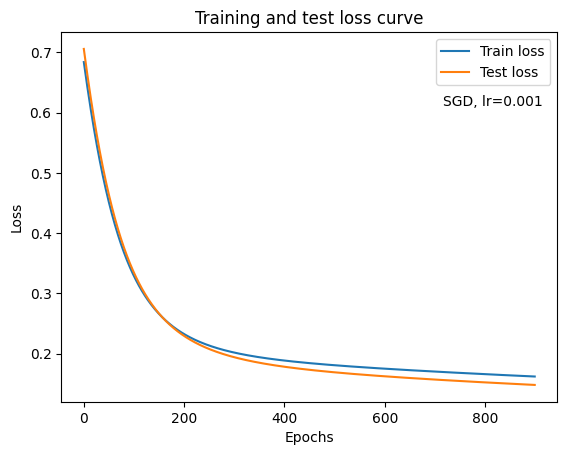

In [30]:
model_0 = nn.Sequential(
    nn.Linear(in_features=17, out_features=2),
    nn.Linear(in_features=2, out_features=1), 
    nn.Tanh()
)

model_0.apply(weights_init_uniform_rule)

loss_fn = nn.MSELoss()

lr= 0.001
optimizer = torch.optim.SGD(model_0.parameters(), lr=lr)

torch.manual_seed(42)

epochs = 900

epoch_count = []
loss_values = []
test_loss_values = []

for epoch in range(epochs):
    model_0.train()
     
    y_pred = model_0(X_train)
     
    loss = loss_fn(y_pred, y_train)
     
    optimizer.zero_grad()
     
    loss.backward()
     
    optimizer.step()
     
    model_0.eval()
     
    with torch.inference_mode():
        test_pred = model_0(X_test)
         
        test_loss = loss_fn(test_pred, y_test)
    
    epoch_count.append(epoch)
    loss_values.append(loss)
    test_loss_values.append(test_loss)
         
    if epoch % 5 == 0:
        print(f"Epoch is {epoch:<3} | Loss: {loss:<22} | Test loss: {test_loss:<22}")

print(f"Epoch is {epoch:<3} | Loss: {loss:<22} | Test loss: {test_loss:<22}")

fig,ax = plt.subplots()
plt.plot(epoch_count, np.array(torch.tensor(loss_values).numpy()), label="Train loss")
plt.plot(epoch_count, test_loss_values, label="Test loss")
plt.title("Training and test loss curve")
plt.ylabel("Loss")
plt.xlabel("Epochs")
ax.annotate(f"SGD, lr={lr}", xy=(0.77, 0.8), xycoords="axes fraction")
plt.legend();

In [31]:
def weights_init_uniform(m):
        classname = m.__class__.__name__
        # for every Linear layer in a model..
        if classname.find('Linear') != -1:
            # apply a uniform distribution to the weights and a bias=0
            m.weight.data.uniform_(0.0, 0.5)
            m.bias.data.fill_(0)

Epoch is 0   | MSE Loss: 0.4716452956199646     | Test MSE loss: 0.4404558837413788    
Epoch is 10  | MSE Loss: 0.45839831233024597    | Test MSE loss: 0.4289635419845581    
Epoch is 20  | MSE Loss: 0.4411216974258423     | Test MSE loss: 0.4140111207962036    
Epoch is 30  | MSE Loss: 0.41888561844825745    | Test MSE loss: 0.39491555094718933   
Epoch is 40  | MSE Loss: 0.39153578877449036    | Test MSE loss: 0.37180960178375244   
Epoch is 50  | MSE Loss: 0.36069175601005554    | Test MSE loss: 0.3465021550655365    
Epoch is 60  | MSE Loss: 0.33011388778686523    | Test MSE loss: 0.32249757647514343   
Epoch is 70  | MSE Loss: 0.3035956621170044     | Test MSE loss: 0.30256372690200806   
Epoch is 80  | MSE Loss: 0.28201138973236084    | Test MSE loss: 0.2862982749938965    
Epoch is 90  | MSE Loss: 0.26397010684013367    | Test MSE loss: 0.2715894877910614    
Epoch is 100 | MSE Loss: 0.24797002971172333    | Test MSE loss: 0.2571107745170593    
Epoch is 110 | MSE Loss: 0.23333

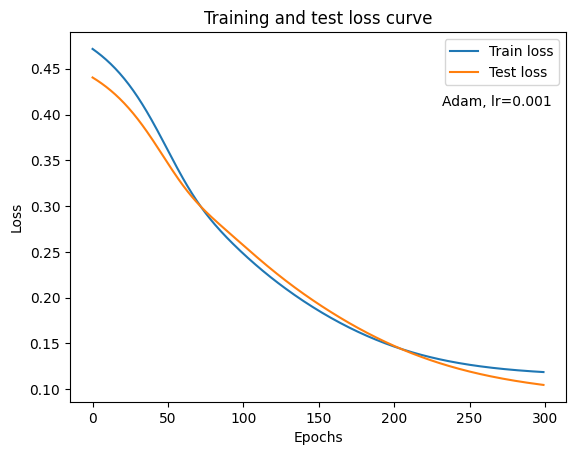

In [32]:
model_0 = nn.Sequential(
    nn.Linear(in_features=17, out_features=4),
    nn.Linear(in_features=4, out_features=1), 
    nn.Tanh()
)

model_0.apply(weights_init_uniform)

loss_fn = nn.MSELoss()

lr = 0.001
optimizer = torch.optim.Adam(model_0.parameters(), lr=lr)

torch.manual_seed(42)

epochs = 300

epoch_count = []
loss_values = []
test_loss_values = []

for epoch in range(epochs):
    model_0.train()
     
    y_pred = model_0(X_train)
     
    loss = loss_fn(y_pred, y_train)
     
    optimizer.zero_grad()
     
    loss.backward()
     
    optimizer.step()
     
    model_0.eval()
     
    with torch.inference_mode():
        test_pred = model_0(X_test)
         
        test_loss = loss_fn(test_pred, y_test)
        #test_accuracy = accuracy_score(y_test, test_pred)
        
    
    epoch_count.append(epoch)
    loss_values.append(loss)
    test_loss_values.append(test_loss)
         
    if epoch % 10 == 0:
        print(f"Epoch is {epoch:<3} | MSE Loss: {loss:<22} | Test MSE loss: {test_loss:<22}") #| Test accuracy: {test_accuracy:<22}")

print(f"Epoch is {epoch:<3} | MSE Loss: {loss:<22} | Test MSE loss: {test_loss:<22}") #| Test accuracy: {test_accuracy:<22}")

fig,ax = plt.subplots()
plt.plot(epoch_count, np.array(torch.tensor(loss_values).numpy()), label="Train loss")
plt.plot(epoch_count, test_loss_values, label="Test loss")
plt.title("Training and test loss curve")
plt.ylabel("Loss")
plt.xlabel("Epochs")
ax.annotate(f"Adam, lr={lr}", xy=(0.75, 0.8), xycoords="axes fraction")
plt.legend();

Epoch is 0   | Loss: 0.42776408791542053    | Test loss: 0.26859259605407715   
Epoch is 5   | Loss: 0.2626318037509918     | Test loss: 0.26650694012641907   
Epoch is 10  | Loss: 0.25964444875717163    | Test loss: 0.26374566555023193   
Epoch is 15  | Loss: 0.2569524943828583     | Test loss: 0.26124221086502075   
Epoch is 20  | Loss: 0.25444164872169495    | Test loss: 0.2589060068130493    
Epoch is 25  | Loss: 0.25201424956321716    | Test loss: 0.2566520571708679    
Epoch is 30  | Loss: 0.24958017468452454    | Test loss: 0.2544000744819641    
Epoch is 35  | Loss: 0.24705040454864502    | Test loss: 0.25206848978996277   
Epoch is 40  | Loss: 0.24433179199695587    | Test loss: 0.24956977367401123   
Epoch is 45  | Loss: 0.24132294952869415    | Test loss: 0.2468060851097107    
Epoch is 50  | Loss: 0.23791122436523438    | Test loss: 0.24366608262062073   
Epoch is 55  | Loss: 0.2339717149734497     | Test loss: 0.24002303183078766   
Epoch is 60  | Loss: 0.22936931252479553

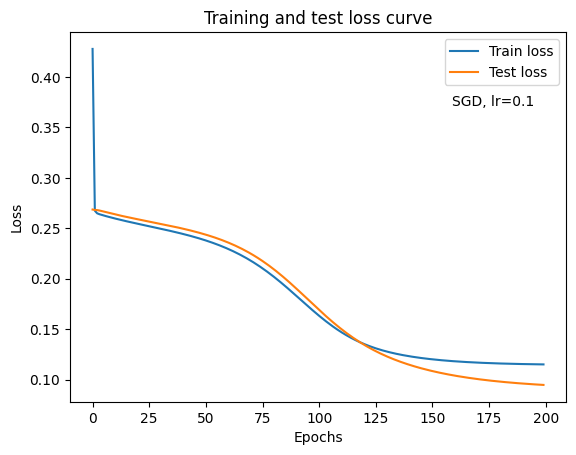

In [33]:
model_0 = nn.Sequential(
    nn.Linear(in_features=17, out_features=2),
    nn.Linear(in_features=2, out_features=1), 
    nn.Tanh()
)

model_0.apply(weights_init_uniform)

loss_fn = nn.MSELoss()

lr= 0.1
optimizer = torch.optim.SGD(model_0.parameters(), lr=lr)

torch.manual_seed(42)

epochs = 200

epoch_count = []
loss_values = []
test_loss_values = []

for epoch in range(epochs):
    model_0.train()
     
    y_pred = model_0(X_train)
     
    loss = loss_fn(y_pred, y_train)
     
    optimizer.zero_grad()
     
    loss.backward()
     
    optimizer.step()
     
    model_0.eval()
     
    with torch.inference_mode():
        test_pred = model_0(X_test)
         
        test_loss = loss_fn(test_pred, y_test)
    
    epoch_count.append(epoch)
    loss_values.append(loss)
    test_loss_values.append(test_loss)
         
    if epoch % 5 == 0:
        print(f"Epoch is {epoch:<3} | Loss: {loss:<22} | Test loss: {test_loss:<22}")

print(f"Epoch is {epoch:<3} | Loss: {loss:<22} | Test loss: {test_loss:<22}")

fig,ax = plt.subplots()
plt.plot(epoch_count, np.array(torch.tensor(loss_values).numpy()), label="Train loss")
plt.plot(epoch_count, test_loss_values, label="Test loss")
plt.title("Training and test loss curve")
plt.ylabel("Loss")
plt.xlabel("Epochs")
ax.annotate(f"SGD, lr={lr}", xy=(0.77, 0.8), xycoords="axes fraction")
plt.legend();